## Reading in and pre-processing the data

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [4]:
images = "/Users/lawrence/Desktop/GTSRB/Train/"
data = []; labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(images,str(i)) 
    for img in os.listdir(img_path):
        im = Image.open(img_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data.append(im)
        labels.append(i)
        
data = np.array(data); labels = np.array(labels)
data.shape

(39209, 32, 32, 3)

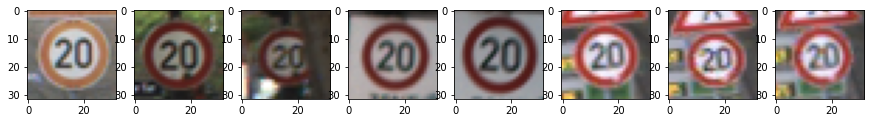

In [6]:
plt.figure(figsize = (15,15))

for i in range(0,39000,5000) :
    plt.subplot(1, 8, i+1)
    plt.imshow(data[i])


In [7]:
x = data.astype('float32')
y = keras.utils.to_categorical(np.array(labels))

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True,stratify=y)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(2000, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2000, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(2000, activation="relu"))
model.add(keras.layers.Dense(43, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3072)              12288     
_________________________________________________________________
dense_4 (Dense)              (None, 2000)              6146000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 2000)              4002000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 2000)             

In [ ]:
#Compinling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Fitting the model
history= model.fit(x_train,y_train, epochs=200, batch_size=32, validation_split=0.3)

Epoch 1/200
687/687 [==============================] - 45s 65ms/step - loss: 2.6033 - accuracy: 0.3066 - val_loss: 2.0744 - val_accuracy: 0.4268
Epoch 2/200
687/687 [==============================] - 47s 68ms/step - loss: 1.5641 - accuracy: 0.5455 - val_loss: 1.3469 - val_accuracy: 0.6000
Epoch 3/200
687/687 [==============================] - 47s 68ms/step - loss: 1.1818 - accuracy: 0.6508 - val_loss: 1.0270 - val_accuracy: 0.6976
Epoch 4/200
687/687 [==============================] - 50s 73ms/step - loss: 0.9818 - accuracy: 0.7043 - val_loss: 0.8035 - val_accuracy: 0.7638
Epoch 5/200
687/687 [==============================] - 45s 65ms/step - loss: 0.8598 - accuracy: 0.7433 - val_loss: 0.5243 - val_accuracy: 0.8462
Epoch 6/200
687/687 [==============================] - 48s 70ms/step - loss: 0.7660 - accuracy: 0.7701 - val_loss: 1.1271 - val_accuracy: 0.7040
Epoch 7/200
687/687 [==============================] - 47s 68ms/step - loss: 0.7058 - accuracy: 0.7875 - val_loss: 0.5274 - val_ac

687/687 [==============================] - 48s 70ms/step - loss: 0.2006 - accuracy: 0.9371 - val_loss: 0.1826 - val_accuracy: 0.9497
Epoch 58/200
687/687 [==============================] - 48s 70ms/step - loss: 0.1964 - accuracy: 0.9378 - val_loss: 0.1303 - val_accuracy: 0.9685
Epoch 59/200
687/687 [==============================] - 51s 74ms/step - loss: 0.2023 - accuracy: 0.9389 - val_loss: 0.2921 - val_accuracy: 0.9155
Epoch 60/200
687/687 [==============================] - 46s 67ms/step - loss: 0.2041 - accuracy: 0.9360 - val_loss: 0.4380 - val_accuracy: 0.8843
Epoch 61/200
687/687 [==============================] - 46s 66ms/step - loss: 0.1972 - accuracy: 0.9374 - val_loss: 0.1307 - val_accuracy: 0.9663
Epoch 62/200
687/687 [==============================] - 45s 66ms/step - loss: 0.1880 - accuracy: 0.9417 - val_loss: 0.1604 - val_accuracy: 0.9592
Epoch 63/200
687/687 [==============================] - 46s 66ms/step - loss: 0.1869 - accuracy: 0.9400 - val_loss: 0.2740 - val_accuracy

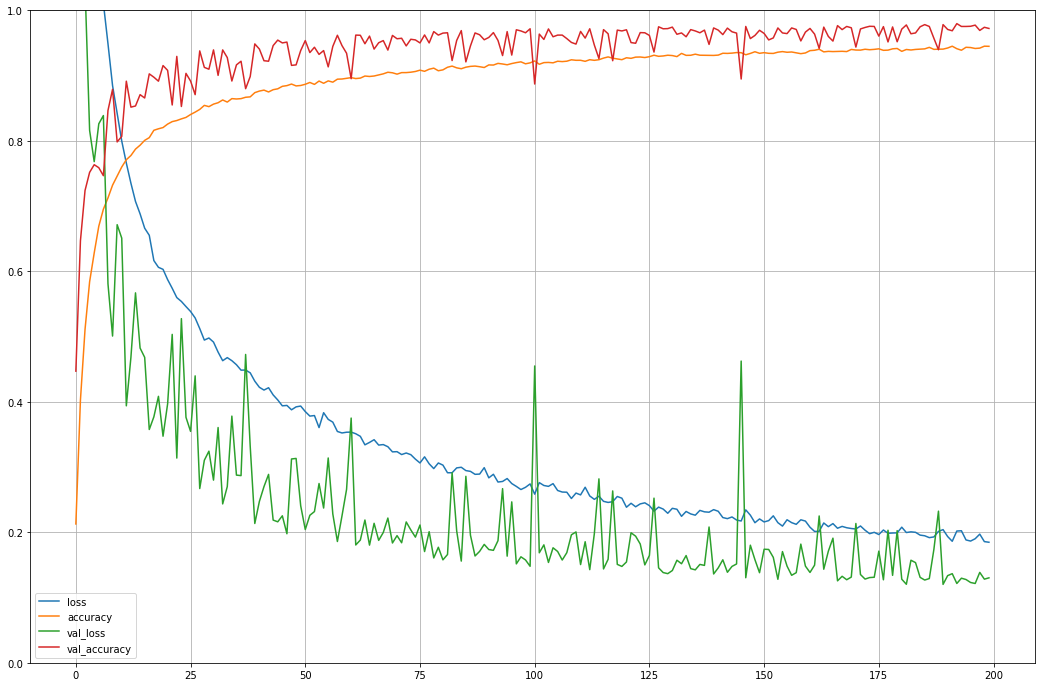

In [15]:
pd.DataFrame(history.history).plot(figsize=(18, 12))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [80]:
y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

print('-Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.
format(accuracy_score(y_test,y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

-Test set accuracy: 48.66%
- Training accuracy: 30.21%
- Validation accuracy: 48.60%


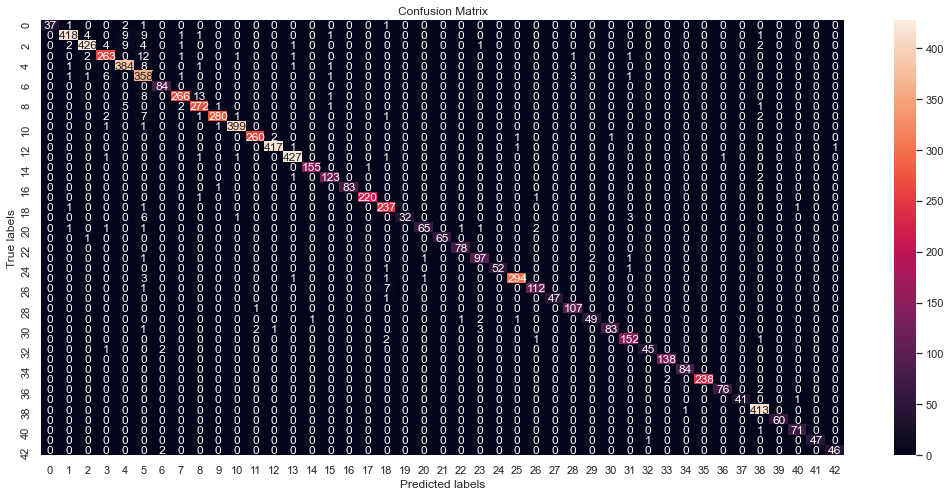

In [76]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()

sns.set(rc = {'figure.figsize':(18,8)})
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); ax.set_title('Confusion Matrix'); 